In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
%matplotlib inline
matplotlib.rcParams['figure.figsize']=(10,6)

In [2]:
df=pd.read_csv('heights.csv')
df.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


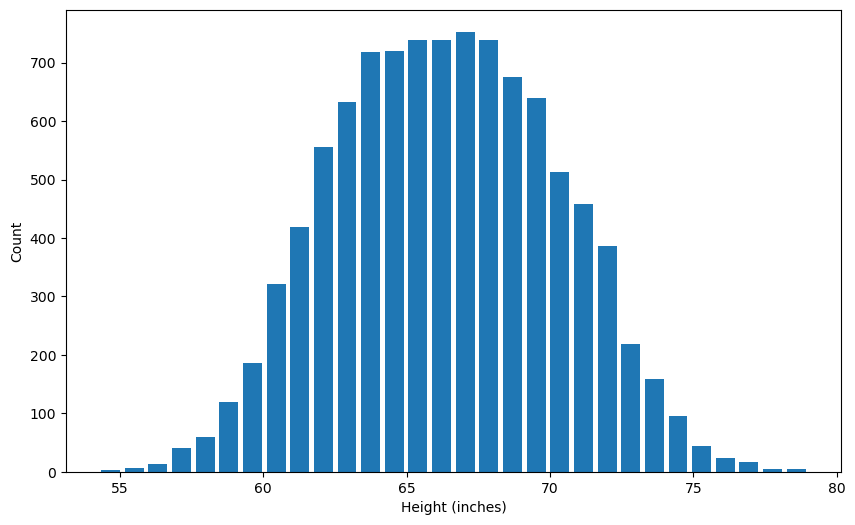

In [3]:
plt.hist(df.height,bins=30,rwidth=0.8)
plt.xlabel('Height (inches)')
plt.ylabel('Count')
plt.show()

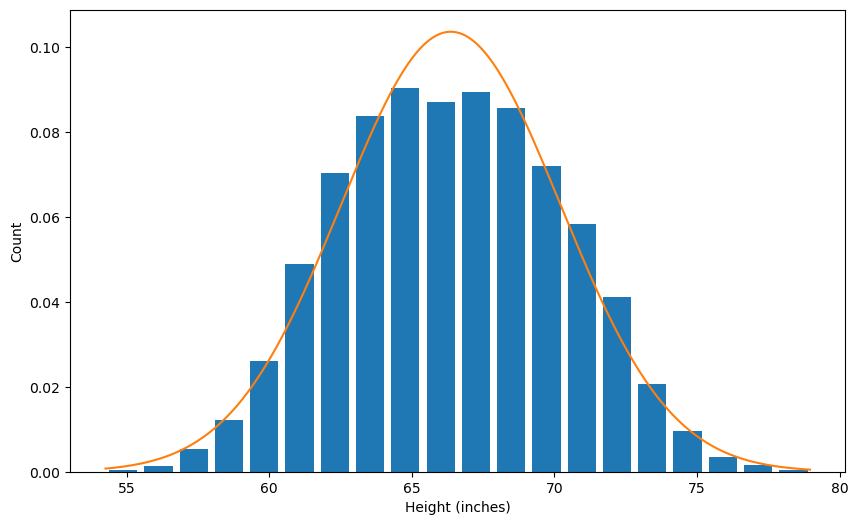

In [5]:
from scipy.stats import norm
plt.hist(df.height,bins=20,rwidth=0.8,density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')
rng=np.arange(df.height.min(),df.height.max(),0.1)
plt.plot(rng,norm.pdf(rng,df.height.mean(),df.height.std()))

In [6]:
upper_limit=df.height.mean()+3*df.height.std()
upper_limit

77.91014411725271

In [7]:
lower_limit=df.height.mean()-3*df.height.std()
lower_limit

54.824975392479274

In [8]:
df[(df.height>upper_limit)|(df.height<lower_limit)]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [11]:
df_std=df[(df.height<upper_limit)&(df.height>lower_limit)]
df_std.shape

(9993, 2)

In [12]:
df['zscore']=(df.height-df.height.mean())/df.height.std()
df.head()

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [13]:
df[df['zscore']>3]

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854


In [15]:
df[df['zscore']<-3]

,gender,height,zscore
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [16]:
df_zscore=df[((df.zscore)>-3)&((df.zscore)<3)]

In [17]:
df_zscore

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375
...,...,...,...
9995,Female,66.172652,-0.050658
9996,Female,67.067155,0.181830
9997,Female,63.867992,-0.649655
9998,Female,69.034243,0.693090


In [18]:
df.shape[0]-df_zscore.shape[0]

7